In [16]:
#pip install opencv-python

In [1]:
#!pip install keras

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

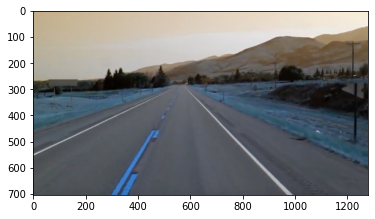

In [18]:
image_path = r"E:\test_image.jpg"
image = cv2.imread(image_path)
plt.imshow(image)


In [19]:
def canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    canny = cv2.Canny(gray, 50, 150)
    return canny

In [20]:
def display_lines(img,lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image


In [21]:
def region_of_interest(canny):
    height = canny.shape[0]
    width = canny.shape[1]
    mask = np.zeros_like(canny)
 
    triangle = np.array([[
    (200, height),
    (550, 250),
    (1100, height),]], np.int32)
 
    cv2.fillPoly(mask, triangle, 255)
    masked_image = cv2.bitwise_and(canny, mask)
    return masked_image

In [22]:
def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]

In [23]:
def average_slope_intercept(image, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0: # y is reversed in image
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    # add more weight to longer lines
    if len(left_fit) and len(right_fit):
    ##over-simplified if statement (should give you an idea of why the error occurs)
        left_fit_average  = np.average(left_fit, axis=0)
        right_fit_average = np.average(right_fit, axis=0)
        left_line  = make_points(image, left_fit_average)
        right_line = make_points(image, right_fit_average)
        averaged_lines = [left_line, right_line]
        return averaged_lines

In [24]:
lane_image = np.copy(image)
lane_canny = canny(lane_image)
cropped_canny = region_of_interest(lane_canny)
lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
averaged_lines = average_slope_intercept(image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)

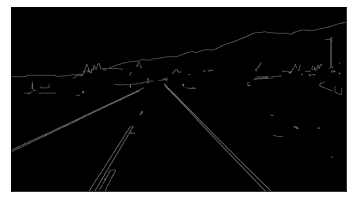

In [25]:
edges = cv2.Canny(image,100,200)
plt.imshow(edges,cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

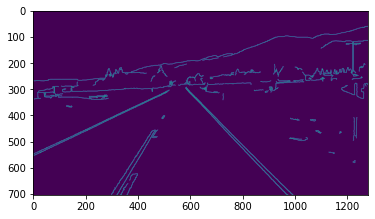

In [26]:
plt.imshow(lane_canny)

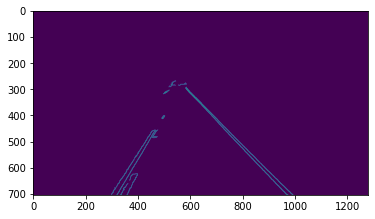

In [27]:
plt.imshow(cropped_canny)

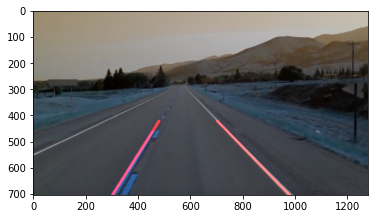

In [28]:
plt.imshow(combo_image)

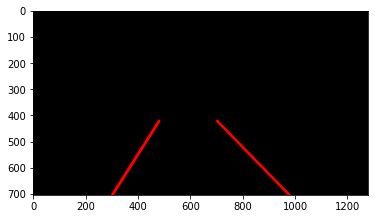

In [29]:
plt.imshow(line_image)

In [30]:
cap = cv2.VideoCapture(r"E:\test2.mp4")
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        canny_image = canny(frame)
        cropped_canny = region_of_interest(canny_image)
        lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
        averaged_lines = average_slope_intercept(frame, lines)
        line_image = display_lines(frame, averaged_lines)
        combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
        cv2.imshow("result", combo_image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows() 
#review2ends


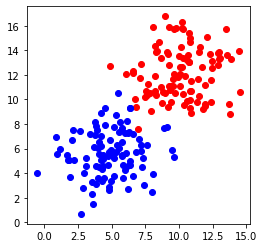

In [1]:
#review3 starts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_pts=100
np.random.seed(0)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts)]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts)]).T
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')

plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def draw(x1,x2):
  ln=plt.plot(x1,x2)

In [5]:
def sigmoid(score):
  return 1/(1+np.exp(-score))

In [6]:
def calculate_error(line_parameters, points , y):
  n=points.shape[0]
  p= sigmoid(points*line_parameters)
  cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy

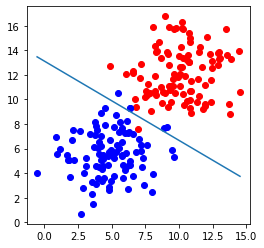

In [7]:
def gradient_descent(line_parameters, points, y , alpha):
  n=points.shape[0]
  for i in range(2000):
    p=sigmoid(points*line_parameters)
    gradient= points.T*(p-y)*(alpha/n)
    line_parameters = line_parameters - gradient
    
    w1=line_parameters.item(0)
    w2=line_parameters.item(1)
    b=line_parameters.item(2)
    
    x1=np.array([points[:,0].min(), points[:,0].max()])
    x2= -b/w2 + (x1*(-w1/w2))
  draw(x1,x2) 
  
n_pts=100
np.random.seed(0)
bias= np.ones(n_pts)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points=np.vstack((top_region, bottom_region))
 
line_parameters = np.matrix([np.zeros(3)]).T
# x1=np.array([bottom_region[:,0].min(), top_region[:,0].max()])
# x2= -b/w2 + (x1*(-w1/w2))
y=np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
 
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
gradient_descent(line_parameters, all_points, y , 0.06)
plt.show()

In [10]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'